---
title: 'Лабораторна робота 3. OpenCV. Просторові методи обробки зображень І. Градаційні перетворення і гістограмні методи (short version)'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: Гарагуля Денис
date: "10.24.2024"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

__Мета:__ _знайомство з поелементними і гістограмними просторовими методами обробки зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python._

::: callout-note
## Примітка
Попередньо потрібно опрацювати лекцію 10.
:::

## Що ви будете вміти?
* Виконувати градаційні перетворення
* Виконувати побудову гістограми матриці яскравостей зображення і виконувати наступні поелементні перетворення на її основі:
  * бінаризацію зображення
  * еквалізацію гістограми
  * соляризацію зображення
  * гамма-корекцію та логарифмічне перетворення
  * отримання негативу
* порівнювання гістограм
* Виконувати побудову гістограм для для кожного з R, G, B каналів

## Градаційні перетворення

__Градаційні перетворення__ задаються функцією перетворення інтенсивностей $s = T(r)$, де $T()$ - оператор перетворення для околу 1x1, тобто функція.  

Наведемо деякі приклади.

In [1]:
# Імпортуємо пакети
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# print(f'version cv2: {cv.__version__}')
print('version cv2: %s' % cv.__version__)

version cv2: 4.10.0


image shape/dimensions: (1180, 786, 3)
image number of pixels: 2782440
grey image shape/scale: (1180, 786)
grey image number of pixels: 927480


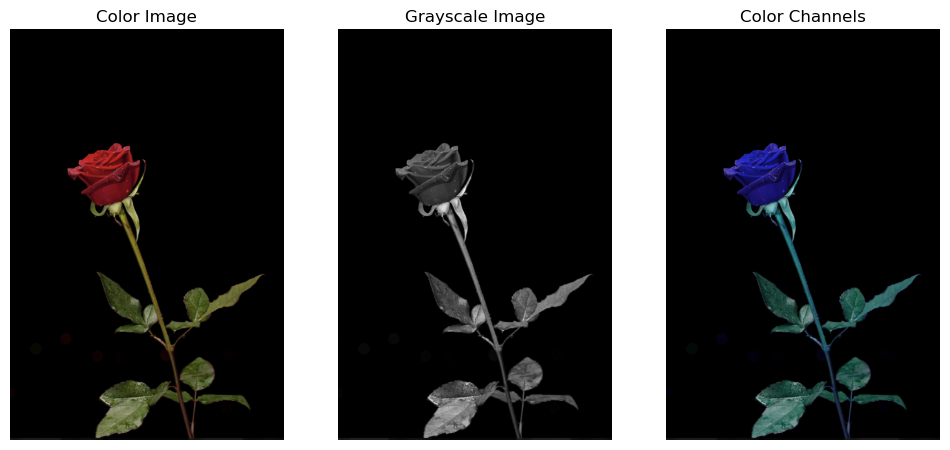

In [2]:
# # імпортуємо RGB-зображення
# image = cv.imread('image/rose.png')
# print(f'image shape/dimentions: {image.shape}')
# print(f'image number of pixel: {image.size}')

# # розділяємо зображення на канали
# red, green, blue = cv.split(image)
# # формуємо напівтонове зображення
# image_gray = cv.imread('rose.png', 0)

# print(f'grey image shape/scale: {image_gray.shape}')
# print(f'grey image number of pixel: {image_gray.size}')

# # візуалізуємо зображення
# cv.imshow('color image', image)
# cv.waitKey(0)
# cv.destroyAllWindows()

import cv2  # Імпорт бібліотеки OpenCV для роботи з зображеннями.
import matplotlib.pyplot as plt  # Імпорт підмодуля pyplot з бібліотеки Matplotlib для візуалізації.

# Зчитуємо зображення з файлу "image/rose.png" за допомогою OpenCV.
image = cv2.imread('orig_images/rose.png')

# Виводимо розміри (ширина, висота, кількість каналів) зображення.
print(f'image shape/dimensions: {image.shape}')

# Виводимо загальну кількість пікселів у зображенні.
print(f'image number of pixels: {image.size}')

# Розділяємо зображення на окремі канали (червоний, зелений, синій).
red, green, blue = cv2.split(image)

# Зчитуємо зображення у відтінках сірого.
image_gray = cv2.imread('orig_images/rose.png', cv2.IMREAD_GRAYSCALE)

# Виводимо розміри напівтонового зображення.
print(f'grey image shape/scale: {image_gray.shape}')

# Виводимо загальну кількість пікселів у напівтоновому зображенні.
print(f'grey image number of pixels: {image_gray.size}')

# Візуалізуємо зображення засобами Matplotlib.

# Створюємо фігуру Matplotlib для розміщення графіків.
plt.figure(figsize=(12, 6))

# Перший графік - кольорове зображення.
plt.subplot(1, 3, 1)
# Виводимо кольорове зображення, конвертуючи його з BGR в RGB для Matplotlib.
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Color Image')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Другий графік - напівтонове зображення.
plt.subplot(1, 3, 2)
# Виводимо напівтонове зображення в градаціях сірого.
plt.imshow(image_gray, cmap='gray')
plt.title('Grayscale Image')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Третій графік - окремі канали.
plt.subplot(1, 3, 3)
# Виводимо кольорове зображення, використовуючи окремі канали.
plt.imshow(cv2.merge([red, green, blue]))
plt.title('Color Channels')  # Додаємо заголовок графіку.
plt.axis('off')  # Вимикаємо відображення координатних вісей.

# Відображення усіх графіків.
plt.show()

### [Бінаризація зображення]()

Суть бінаризації напівтонового зображення полягає  у трансформації восьмибітного зображення у двобітне. Засобами _openCV_ це можна зробити наступним чином.

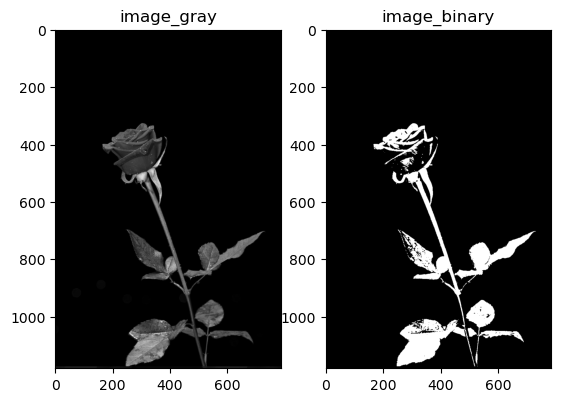

In [3]:
# Візуалізація за допомогою matplotlib
# plt.imread('rose.png')
plt.gray()
# plt.subplot(111)
# plt.imshow(image_gray)
# plt.title('Gray Image')
# plt.show()
# plt.savefig('Gray_image.png')

def image_gray_binary(image_input, threshold=50):
    # Бінаризація зображення

    image_output = image_input.copy()

    for row in range(0, image_input.shape[0]):
        for column in range(0, image_input.shape[1]):
            if image_input[row, column] <= threshold:
                image_output[row, column] = 0
            else:
                image_output[row, column] = 255
    return image_output

image_binary = image_gray_binary(image_gray)

# Побудова і вивід зображення у файл
plt.subplot(121)
plt.imshow(image_gray)
plt.title('image_gray')
plt.subplot(122)
plt.imshow(image_binary)
plt.title('image_binary')
# plt.savefig('image_binary.png')
plt.show()

__Завдання для самостійної роботи__.

  * Обгрунтувати оптимальне значення порогу бінаризації за допомогою гістограми
  * Написати код, який би виводив зображення засобами бібіліотеки _cv2_
  
  Альтернативний варіант з використанням методу бінарної класифікації можна реалізувати так.

Введіть поріг бінаризації:  70


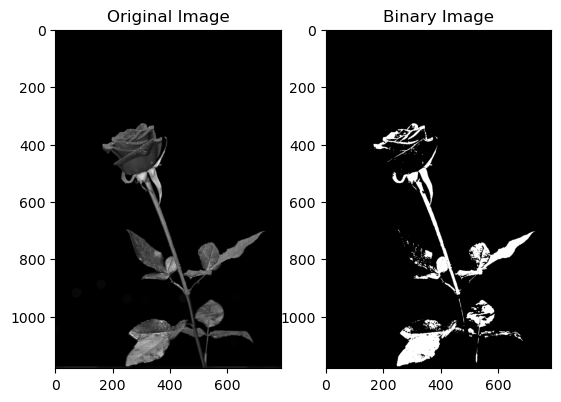

True

In [4]:
# # Вводимо поріг бінаризації:
# T = int(input('Введіть поріг бінаризації: '))
# r, threshold = cv.threshold(image_gray, T, 255, cv.THRESH_BINARY)

# # r - поріг бінаризації
# cv.imshow('image_gray', threshold)
# cv.waitKey(0)
# cv.destroyAllWindows()
# # Запис зображення на диск
# cv.imwrite('image_binary.png', threshold)

# Аб за допомогою такої конструкції
# img = cv.imread('grey_for_binary.png',0)
# cv.imshow('image',img)
# k = cv.waitKey(0)
# if k == 27:         # wait for ESC key to exit
#     cv.destroyAllWindows()
# elif k == ord('s'): # wait for 's' key to save and exit
#     cv.imwrite('image_2.png',img)
#     cv.destroyAllWindows()

import matplotlib.pyplot as plt

# Вводимо поріг бінаризації:
T = int(input('Введіть поріг бінаризації: '))

# Використання функції threshold OpenCV для бінаризації зображення.
# Зверніть увагу, що у Matplotlib для відтінків сірого немає необхідності вказувати другий параметр r.
threshold = cv.threshold(image_gray, T, 255, cv.THRESH_BINARY)[1]

# Візуалізація зображення та його бінаризованої версії.
plt.subplot(121)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(threshold, cmap='gray')
plt.title('Binary Image')

# Показуємо графіки.
plt.show()

# Зберігаємо бінаризоване зображення на диск.
cv.imwrite('image_binary.png', threshold)

### 1. [Негатив](https://www.geeksforgeeks.org/negative-transformation-of-an-image-using-python-and-opencv/)

Перетворення зображення в негатив з яскравостями у діапазоні `[0,L-1]` здійснюється за допомогою наступного перетворення: `s = (L - 1) - r`
де `L - 1` це максимальна можлива яскравість пікселя, `r` це яскравість пікселя який перетворюємо

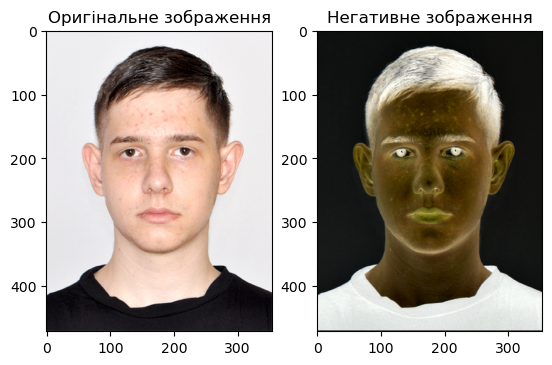

In [5]:
import cv2 
import matplotlib.pyplot as plt 

# Read an image 
img_bgr = cv2.imread('orig_images/i_image.jpg', 1) 
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) 
plt.title('Оригінальне зображення')
# get height and width of the image 
height, width, _ = img_bgr.shape 

for i in range(0, height - 1): 
	for j in range(0, width - 1): 
		
		# Get the pixel value 
		pixel = img_bgr[i, j] 
		
		# Negate each channel by 
		# subtracting it from 255 
		
		# 1st index contains red pixel 
		pixel[0] = 255 - pixel[0] 
		
		# 2nd index contains green pixel 
		pixel[1] = 255 - pixel[1] 
		
		# 3rd index contains blue pixel 
		pixel[2] = 255 - pixel[2] 
		
		# Store new values in the pixel 
		img_bgr[i, j] = pixel 

# Display the negative transformed image 
plt.subplot(122)
plt.imshow(img_bgr) 
plt.title('Негативне зображення')
plt.show() 

### 2. [Логарифмічні перетворення](https://www.geeksforgeeks.org/log-transformation-of-an-image-using-python-and-opencv/?ref=rp) 

Для логарифмічного перетворення формулою є: `s = c * log(1 + r)` де `с` - константа, `r` - яскравість пікселя

C:\Users\2dens\AppData\Local\Temp\ipykernel_5224\3263399714.py:9: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(image + 1))
C:\Users\2dens\AppData\Local\Temp\ipykernel_5224\3263399714.py:13: RuntimeWarning: invalid value encountered in cast
  log_image = np.array(log_image, dtype = np.uint8)


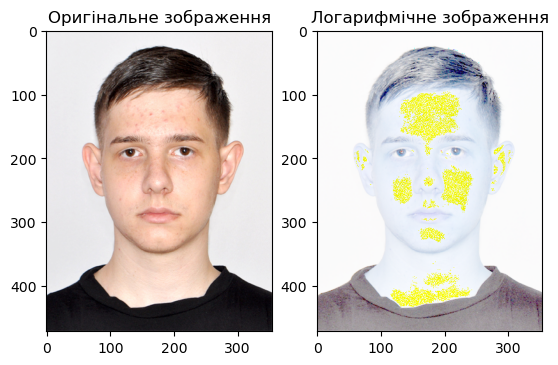

In [6]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

# Read an image 
image = cv2.imread('orig_images/i_image.jpg') 
# Apply log transformation method 
c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 

# Specify the data type so that 
# float value will be converted to int 
log_image = np.array(log_image, dtype = np.uint8) 

# Display both images 
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
plt.title('Оригінальне зображення')
plt.subplot(122)
plt.imshow(log_image) 
plt.title('Логарифмічне зображення')
plt.show() 


### 3. [Степенева(гамма-коеркція)](https://issue.life/questions/53104983)

Для степеневого перетворення використовується формула s = cr<sup>ɣ</sup> де `ɣ` є параметром, що визначає інтенсивність корекції

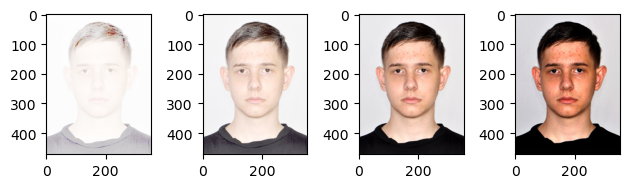

In [7]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
# Open the image. 
img = cv2.imread('orig_images/i_image.jpg') 
pl = 141
# Trying 4 gamma values. 
for gamma in [0.1, 0.5, 1.2, 2.2]: 
	
	# Apply gamma correction. 
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8') 
    plt.subplot(pl)
    plt.imshow(cv2.cvtColor(gamma_corrected, cv2.COLOR_BGR2RGB))
    pl += 1
plt.tight_layout()
plt.show()

### 4. [Соляризація зображення]()

Для соляризації формула співпадає з негативом, тобто `s = (L - 1) - r`, але перетворення відбувається тільки якщо яскравість пікселя більше заданої

Введіть коефіцієнт соляризації (0-255):  200


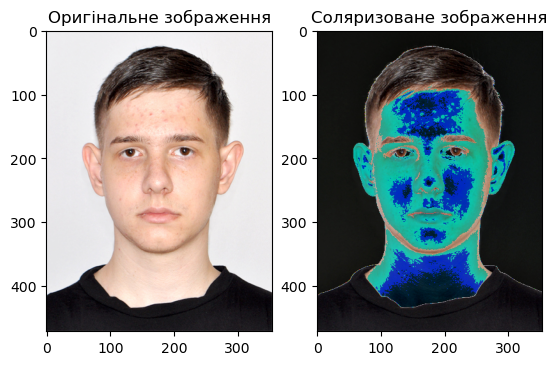

In [8]:
import cv2
import matplotlib.pyplot as plt

# Read an image
img_bgr = cv2.imread('orig_images/i_image.jpg', 1)

plt.subplot(121)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Оригінальне зображення')
# get height and width of the image
height, width, _ = img_bgr.shape
solar = int(input("Введіть коефіцієнт соляризації (0-255): "))
for i in range(0, height - 1):
    for j in range(0, width - 1):
        # Get the pixel value
        pixel = img_bgr[i, j]

        # Negate each channel by
        # subtracting it from 255

        # 1st index contains red pixel
        if pixel[0] >= solar:
            pixel[0] = 255 - pixel[0]

        # 2nd index contains green pixel
        if pixel[1] >= solar:
            pixel[1] = 255 - pixel[1]

        # 3rd index contains blue pixel
        if pixel[2] >= solar:
            pixel[2] = 255 - pixel[2]

        # Store new values in the pixel
        img_bgr[i, j] = pixel

    # Display the negative transformed image
plt.subplot(122)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.title('Соляризоване зображення')
plt.show()

## Відозміна гістограми

### 5. [Еквалізація гістограми](https://habr.com/ru/post/244507/)

Гістограма цифрового зображення `f(x,y)`, інтенсивності якого змінюються в діапазоні `[0,L-1]`, є дискретною функцією $$h(r_k)=n_k$$ де r<sub>k</sub> - це k-те значення інтенсивності, а n<sub>k</sub> - загальна кількість пікселів в `f` з інтенсивністю r<sub>k</sub>. Аналогічно, нормалізована гістограма цифрового зображення `f(x,y)` це $$p(r_k)=\frac{h(r_k)}{MN}=\frac{n_k}{MN}$$
де M та N - це розміри зображення (відповідно рядки та стовпці). Загальноприйнятою практикою є ділення кожного компонента гістограми на загальну кількість пікселів для його нормалізації.

Оскільки p(r<sub>k</sub>) - це ймовірність появи заданого рівня інтенсивності r<sub>k</sub> в зображенні, сума всіх компонентів дорівнює 1.

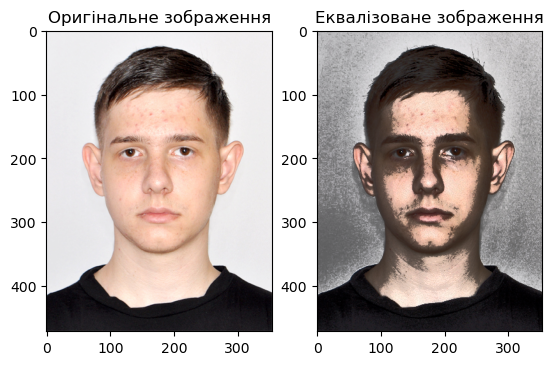

In [9]:
# import Opencv
import cv2
import matplotlib.pyplot as plt

# Read the astrophoto
image = cv2.imread('orig_images/i_image.jpg')

# Convert to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split the HSV channels
h, s, v = cv2.split(hsv_image)

# Equalize the V (Value) channel
v_equalized = cv2.equalizeHist(v)

# Merge the HSV channels back, with the equalized V channel
hsv_image = cv2.merge([h, s, v_equalized])

# show image input vs output
plt.subplot(121)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Оригінальне зображення')
plt.subplot(122)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.title('Еквалізоване зображення')
plt.show()


### 6. [Оцінка гістограми](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)

[Ще одне посилання](https://docs.opencv.org/master/d8/dbc/tutorial_histogram_calculation.html)

Гістограми необхідні для візуалізації розподілу значень кольорів у зображені

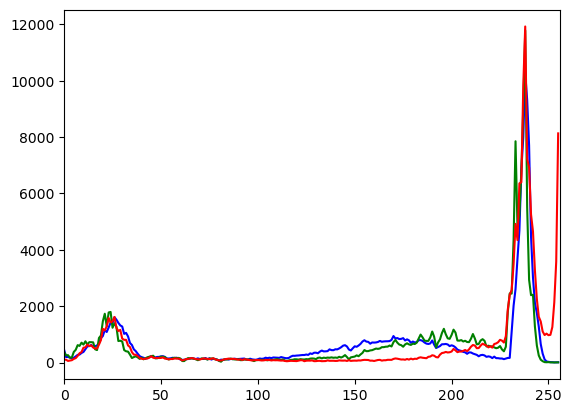

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('orig_images/i_image.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

## Завдання для самостіної роботи

1. Створити Notebook-документ `<lab_3_StudentLastName>` за допомогою Jupyter Notebook або Jupyter Lab. (Див. [тут](https://devpractice.ru/python-lesson-1-install/), [тут](https://devpractice.ru/python-lesson-6-work-in-jupyter-notebook/) і [тут](https://jupyter-notebook.readthedocs.io/en/stable/notebook.html)).

1. Відобразити в робочому документі ("зошиті" ipython) виконання пунктів 1-6 наведених нижче, скориставшись інтерактивними посиланнями на відповідну документацію. __В якості зображення використати власний портрет, отриманий за допомогою цифрової камери__

1. Робочий документ оформити у вигляді Notebook-документу (файл __.ipynb__).

1. Дати відповіді на контрольні запитання.

1. Скомпілювати звіт у форматі __.html__. Для цього необхідно завантажити термінал і у командному рядку запустити наступну команду:

`jupyter nbconvert lab_3_StudentLastName.ipynb --to html` або за допомогою Qurto:  
`quarto preview lab_3_StudentLastName.ipyn`

6. Представити звіт у вигляді архіву. Проект має складатися мінімум з двох файлів: `lab_3_StudentLastName.ipynb` та `lab_1_StudentLastName.html`

## Контрольні запитання

1. У чому полягає сенс градаційних перетворень?
    * Градаційні перетворення — це процеси, які змінюють яскравість і контраст зображення. Вони використовуються в обробці зображень для підвищення видимості деталей.
1. На чому ґрунтуються гістограмні методи?
    * Гістограмні методи ґрунтуються на аналізі та обробці яскравості та розподілу яскравостей пікселів у зображені

## References

1. [Anaconda (Python distribution).](https://uk.wikipedia.org/wiki/Anaconda_(Python_distribution))
2. [Conda.](https://conda.io/en/latest/)
3. [Histograms.](https://docs.opencv.org/master/d6/dc7/group__imgproc__hist.html#ga6ca1876785483836f72a77ced8ea759a)
4. [Histogram Calculation.](http://habrahabr.ru/post/115903/)
5. [Image Processing (imgproc module).](https://docs.opencv.org/master/d7/da8/tutorial_table_of_content_imgproc.html)